# 1. Load Image
# 2. Change to Gray Scale
# 3. Reducing Noise & Smoothing Image ( Gaussian Blur or Filter)
# 4. Selecting ROI

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

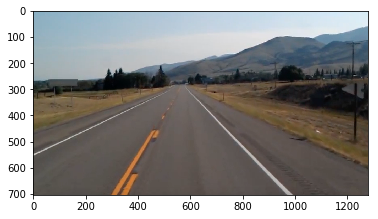

In [2]:
img = cv2.imread('test_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Detecting Edges

In [3]:
def Canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur, 50,150)
    return canny

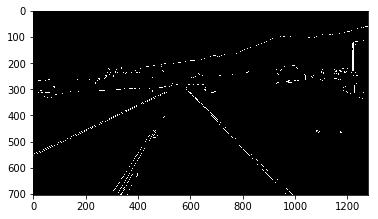

In [4]:
lane = np.copy(img)
canny = Canny(lane)
plt.imshow(canny,cmap='gray')
plt.show()

### Reason Of Interest

In [5]:
def roi(img):
    height = img.shape[0]
    poly = np.array([[(250,height),(1100,height),(600,220)]])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask,poly,255)
    mask_img = cv2.bitwise_and(img, mask)
    return mask_img

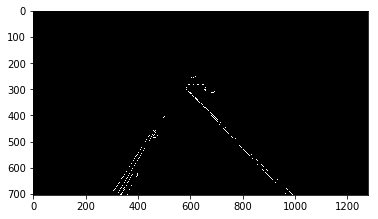

In [6]:
roi_img = roi(canny)
plt.imshow(roi_img,cmap='gray')
plt.show()

Will use Hough Transform | 
which is used to detect straight lines in any image 

In [7]:
def display_lines(img, lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_img, (x1,y1),(x2,y2),(0,0,255),10)
    return line_img

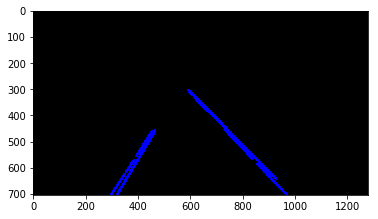

In [8]:
lines = cv2.HoughLinesP(roi_img, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
lined_img = display_lines(lane,lines)
plt.imshow(lined_img)
plt.show()

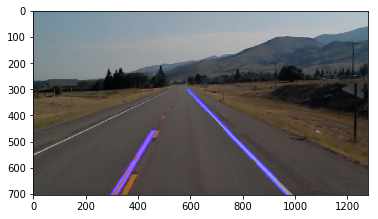

In [9]:
combo_img = cv2.addWeighted(lane,0.8, lined_img, 1, 1)
plt.imshow(combo_img,cmap = 'gray')
plt.show()

# Video File

In [10]:
import cv2
import time
import numpy as np

#helper Functions
def Canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur, 50,150)
    return canny

def roi(img):
    height = img.shape[0]
    poly = np.array([[(250,height),(1100,height),(600,220)]])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask,poly,255)
    mask_img = cv2.bitwise_and(img, mask)
    return mask_img

def display_lines(img, lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_img, (x1,y1),(x2,y2),(255,0,0),10)
    return line_img

cap = cv2.VideoCapture('test.mp4.mp4')

# FRAMES PER SECOND FOR VIDEO
fps = 50

# Always a good idea to check if the video was acutally there
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        
        canny = Canny(frame)
        roi_img = roi(canny)
        lines = cv2.HoughLinesP(roi_img, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
        lined_img = display_lines(frame,lines)
        combo_img = cv2.addWeighted(frame,0.8, lined_img, 1, 1)
        
        # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        time.sleep(1/fps)
        cv2.imshow('frame',combo_img)
 
        # Press q to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):    
            break
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
cv2.destroyAllWindows()